# ScalabeTranslationStatistics

In [21]:
size = ["5", "10", "20", "40", "80", "100"]
level = 1

1

In [22]:
import Pkg
Pkg.activate("..")
using NonLinearSystemNeuralNetworkFMU

  Activating project at `~/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl`


In [23]:
rootDir = "/mnt/home/aheuermann/workdir/phymos/ScalableTranslationStatistics"

lib = joinpath(rootDir, "02_SourceModel", "02_Model", "01_AuthoringModel", "ScalableTranslationStatistics", "package.mo")
modelName = "ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_$(size[level])"

"ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5"

In [24]:
profilingInfo = profiling(modelName, lib; threshold=0);

┌ Info: Using omc: /mnt/home/aheuermann/workdir/OpenModelica/install_cmake/bin/omc
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:41
┌ Info: Path to zmq file="/tmp/openmodelica.aheuermann.port.julia.rDeV1IWn2M"
└ @ OMJulia /mnt/home/aheuermann/.julia/packages/OMJulia/EXbLd/src/OMJulia.jl:162
┌ Info: setCommandLineOptions
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:101
┌ Info: simulate
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:107
┌ Info: Slowest eq 907: ncall: 835394, time: 0.685618541, maxTime: 0.002980967, fraction: 0.0670577487945385
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:174


In [25]:
allUsedvars = vcat([prof.usingVars for prof in profilingInfo]...)

9-element Vector{String}:
 "scalableModelicaModel.simpleSpring[6].s_rel"
 "scalableModelicaModel.simpleSpring[7].s_rel"
 "scalableModelicaModel.simpleSpring[3].s_rel"
 "scalableModelicaModel.simpleSpring[8].s_rel"
 "scalableModelicaModel.simpleSpring[2].s_rel"
 "scalableModelicaModel.simpleSpring[5].s_rel"
 "scalableModelicaModel.simpleSpring[4].s_rel"
 "outputs[8]"
 "scalableModelicaModel.springChain[8].flange_b.s"

In [26]:
(min, max) = minMaxValuesReSim(allUsedvars, modelName, lib)

┌ Info: Using omc: /mnt/home/aheuermann/workdir/OpenModelica/install_cmake/bin/omc
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:41
┌ Info: Path to zmq file="/tmp/openmodelica.aheuermann.port.julia.MY248atGKz"
└ @ OMJulia /mnt/home/aheuermann/.julia/packages/OMJulia/EXbLd/src/OMJulia.jl:162
┌ Info: setCommandLineOptions
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:101
┌ Info: simulate
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:107


([-2.257845130915469, -2.4751739637239645, 0.015857515793677397, -2.4708965493947836, 0.08468308242838637, -0.3007696312702662, 0.09499999999999997, 0.3735892257639386, 0.44231235050405077], [0.12341059676700081, 0.190764970484369, 5.9240153258176065, 0.10499999999999998, 5.999645691832792, 5.3161383939117, 5.937283094524252, 25.98773827983626, 24.610658154246906])

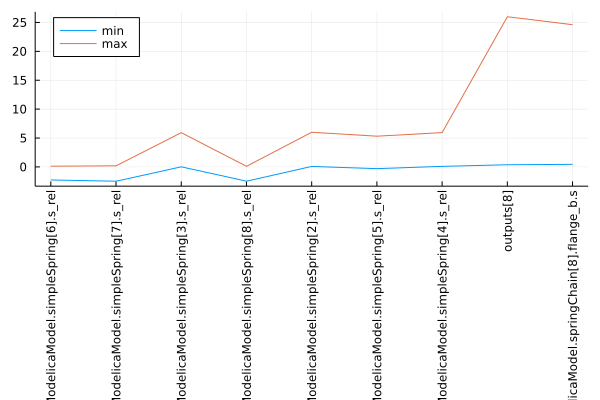

In [27]:
using Plots

plot(allUsedvars, min, xrotation=90, label="min", legend=:topleft)
plot!(allUsedvars, max, label="max")

## Generate FMU

In [41]:
fmu = generateFMU(modelName, lib, workingDir = modelName)
mkpath("fmus")
cp(fmu, joinpath("fmus", basename(fmu)), force=true)
fmu = joinpath("fmus", basename(fmu))

┌ Info: Using omc: /mnt/home/aheuermann/workdir/OpenModelica/install_cmake/bin/omc
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/profiling.jl:41
┌ Info: Path to zmq file="/tmp/openmodelica.aheuermann.port.julia.mCDByeWfWt"
└ @ OMJulia /mnt/home/aheuermann/.julia/packages/OMJulia/EXbLd/src/OMJulia.jl:162
┌ Info: setCommandLineOptions
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/genFMUs.jl:137
┌ Info: buildFMU
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/genFMUs.jl:143


"fmus/ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5.fmu"

In [38]:
allEqs = [prof.eqInfo.id for prof in profilingInfo]

8-element Vector{Int64}:
 907
 928
 834
 951
 813
 882
 857
 987

In [43]:
fmu_interface = addEqInterface2FMU(modelName, fmu, allEqs, workingDir = modelName);
cp(fmu, joinpath("fmus", basename(fmu_interface)), force=true)
fmu_interface = joinpath("fmus", basename(fmu_interface))

-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Failed
-- Check if compiler accepts -pthread
-- Check if compiler accepts -pthread - yes
-- Found Threads: TRUE  
-- Building for FMI platform linux64
-- Configuring done
-- Generating done
-- Build files have been written to: /mnt/home/aheuermann/workdir/juli

[ 61%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/jacobian_util.c.o
[ 62%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/list.c.o
[ 63%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/modelica_string.c.o
[ 64%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/modelica_string_lit.c.o
[ 65%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/omc_error.c.o
[ 66%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/omc_file.c.o
[ 67%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.dir/util/omc_init.c.o
[ 68%] Building C object CMakeFiles/ScalableTranslationStatistics_Examples_Sc

 (deflated 78%)
  adding: sources/external_solvers/dgesc2.c (deflated 63%)
  adding: sources/external_solvers/dswap.c (deflated 59%)
  adding: sources/external_solvers/dger.c (deflated 66%)
  adding: sources/external_solvers/dlabad.c (deflated 57%)
  adding: sources/external_solvers/dgetrf.c (deflated 64%)
  adding: sources/external_solvers/ieeeck.c (deflated 67%)
  adding: sources/external_solvers/dlamch.c (deflated 74%)
  adding: sources/external_solvers/f2c.h (deflated 66%)
  adding: sources/external_solvers/r1mpyq_.c (deflated 65%)
  adding: sources/external_solvers/dlaswp.c (deflated 60%)
  adding: sources/external_solvers/dgetc2.c (deflated 62%)
  adding: sources/external_solvers/qrfac_.c (deflated 65%)
  adding: sources/external_solvers/dgesv.c (deflated 62%)
  adding: sources/external_solvers/minpack.h (deflated 85%)
  adding: sources/external_solvers/iparmq.c (deflated 69%)
  adding: sources/external_solvers/dgetrs.c (deflated 66%)
  adding: sources/external_solvers/r1updt_.c 

 (deflated 83%)
  adding: sources/fmi-export/fmu2_model_interface.h (deflated 59%)
  adding: sources/fmi-export/special_interface.c (deflated 73%)
  adding: sources/fmi-export/fmu_read_flags.c.inc (deflated 67%)
  adding: sources/fmi-export/special_interface.h (deflated 48%)
  adding: sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_model.h (deflated 85%)
  adding: sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_03lsy.c (deflated 95%)
  adding: sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_10asr.c (deflated 43%)
  adding: sources/linearization/ (stored 0%)
  adding: sources/linearization/linearize.h (deflated 46%)
  adding: sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_14lnz.c (deflated 91%)
  adding: sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_04set.c (deflated 60%)
  adding: sources/ScalableTranslationStatistics_Examples_Sca

┌ Info: Unzip FMU
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/genFMUs.jl:231
┌ Info: Add special C sources
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/genFMUs.jl:236
┌ Info: Compiling FMU
└ @ NonLinearSystemNeuralNetworkFMU /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/src/genFMUs.jl:197
In file included from /mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/example/ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5/FMU/sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_FMU.c:59:
/mnt/home/aheuermann/workdir/julia/NonLinearSystemNeuralNetworkFMU.jl/example/ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5/FMU/sources/fmi-export/fmu2_model_interface.c.inc: In function ‘omc_assert_fmi_common’:
/mnt/home/aheuermann/workdir/julia/NonLinearSystemNeur

"fmus/ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5.interface.fmu"

## Generate data

In [51]:
N = 10

for prof in profilingInfo[1:1]
  eqIndex = prof.eqInfo.id
  inputVars = prof.usingVars
  outputVars = prof.iterationVariables

  mi = Array{Float64}(undef, length(inputVars))
  ma = Array{Float64}(undef, length(inputVars))

  for (i,var) in enumerate(inputVars)
    idx = findfirst(x->x==var, allUsedvars)
    mi[i] = min[idx]
    ma[i] = max[idx]
  end

  fileName = abspath(joinpath("data", "eq_$(prof.eqInfo.id).csv"))

  generateTrainingData(fmu_interface, fileName, eqIndex, inputVars, mi, ma, outputVars; N = N)
end

┌ Info: fmi2Unzip(...): Written file `sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_11mix.h`, but file is empty.
└ @ FMIImport /mnt/home/aheuermann/.julia/packages/FMIImport/bAEg3/src/FMI2_ext.jl:65
┌ Info: fmi2Unzip(...): Written file `sources/isfmi2`, but file is empty.
└ @ FMIImport /mnt/home/aheuermann/.julia/packages/FMIImport/bAEg3/src/FMI2_ext.jl:65
┌ Info: fmi2Unzip(...): Written file `sources/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5_includes.h`, but file is empty.
└ @ FMIImport /mnt/home/aheuermann/.julia/packages/FMIImport/bAEg3/src/FMI2_ext.jl:65
┌ Info: fmi2Unzip(...): Successfully unzipped 230 files at `/tmp/fmijl_iI22cF/ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5.interface`.
└ @ FMIImport /mnt/home/aheuermann/.julia/packages/FMIImport/bAEg3/src/FMI2_ext.jl:76
┌ Info: fmi2Load(...): FMU resources location is `file:////tmp/fmijl_iI22cF/ScalableTranslationStatistics.Examples.ScaledNLEqu

ErrorException: could not load symbol "myfmi2evaluateEq":
/tmp/fmijl_iI22cF/ScalableTranslationStatistics.Examples.ScaledNLEquations.NLEquations_5.interface/binaries/linux64/ScalableTranslationStatistics_Examples_ScaledNLEquations_NLEquations_5.so: undefined symbol: myfmi2evaluateEq